In [10]:
import pandas as pd
import numpy as np
import cross_validation as cv
datapath = '../data/'

Here a perfect model will be generated, considering the 3737(12%) of 30489 customers interested.

In [7]:
# 1) Build a perfect proba array, i.e., create 3737 + 26752 rows (validation dataset length) with [0,1] and [1,0] respectively 
yhat_perfect = np.array([[0,1]]*3737)
yhat_perfect = np.append(arr = yhat_perfect, values = np.array([[1,0]]*26752), axis = 0)

In [8]:
# 2) Build the y_val with the first 3737 elements being of class 1 and the rest (26752) being of class 0
y_val_perfect = pd.Series(np.ones(3737, dtype = int))
y_val_perfect = y_val_perfect.append(pd.Series(np.zeros(26752, dtype = int)))

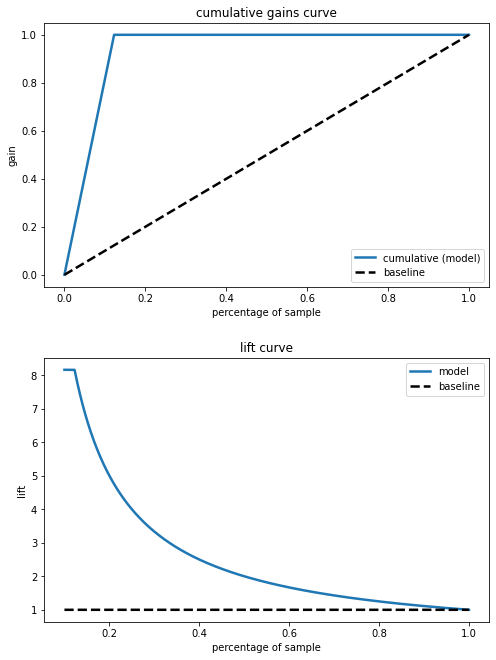

In [11]:
# 3) Finally,  plot it and export the perfect ranked list
table_perf = cv.gain_lift_curve(yhat_perfect,y_val_perfect)
metrics_perf, new_table_perf = cv.precision_recall_at_k(table_perf, 12200)
new_table_perf.to_pickle(datapath+'processed/perfect_model_table.pkl')